Heart Disease Prediction with Logistic Regression: Analysis of Heart Disease Dataset

Problem Statement:
One of the hospitals has a patient dataset that contains a wide range of heart-related features. This data allows hospital staff to conduct detailed analyses of heart-related conditions and treatments. We must build a logistic regression model to predict whether a patient has heart disease or not. Calculate the feature importance as well. The dataset contains data for around 303 patients.

In [47]:
#Data Description:
#age: Age of the patient in years.
#gender: Gender of the patient.
#cp: Chest pain type.
#trestbps: Resting blood pressure (in mm Hg on admission to the hospital).
#chol: Serum cholesterol in mg/dl.
#fbs: fasting blood sugar > 120 mg/dl (1 = true; 0 = false).
#restecg: Resting electrocardiographic results.
#thalach: Maximum heart rate achieved.
#exang: Exercise induced angina (1 = yes; 0 = no).
#oldpeak: ST depression induced by exercise relative to rest.
#slope: The slope of the peak exercise ST segment.
#ca: Number of major vessels (0-3) colored by fluoroscopy.
#thal: 3 = normal; 6 = fixed defect; 7 = reversible defect.
#heart_diagnosis: Diagnosis of heart disease (angiographic disease status) (0 = No heart disease, >0 = heart disease).

Tasks/Activities List:

Your code should contain the following activities/Analysis:

Read the heart dataset.

Exploratory Data Analysis (EDA) - Show the Data quality check, treat the missing values, etc if any.

Transform the categorical data.

Apply the Logistic Regression model.

Print the model results.

Get the feature importance.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("heart_disease.csv")

In [5]:
df.head(10)

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart_diagnosis
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


In [6]:
df.tail(5)

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart_diagnosis
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,NaN,3.0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              303 non-null    float64
 1   gender           303 non-null    float64
 2   cp               303 non-null    float64
 3   trestbps         303 non-null    float64
 4   chol             303 non-null    float64
 5   fbs              303 non-null    float64
 6   restecg          303 non-null    float64
 7   thalach          303 non-null    float64
 8   exang            303 non-null    float64
 9   oldpeak          303 non-null    float64
 10  slope            303 non-null    float64
 11  ca               299 non-null    float64
 12  thal             301 non-null    float64
 13  heart_diagnosis  303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


In [8]:
df.describe()

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart_diagnosis
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [10]:
df.isnull().sum()

age                0
gender             0
cp                 0
trestbps           0
chol               0
fbs                0
restecg            0
thalach            0
exang              0
oldpeak            0
slope              0
ca                 4
thal               2
heart_diagnosis    0
dtype: int64

In [19]:
df['ca'].mean()

0.6722408026755853

In [20]:
df['thal'].mean()

4.73421926910299

Now the size of the 'ca' column is 303 rows and only 4 missing values exist, it is a relatively small percentage of missing data (less than 2% of the total data).

Mean/Median/Mode Imputation:
Reason: This method is simple and suitable when we have a small number of missing values. It won't significantly alter the distribution of the 'ca' column since the missing values are relatively few. Using mean or median imputation will help us to maintain the overall central tendency of the data.


In [21]:
df['ca'].fillna(df['ca'].mean(),inplace=True)

In [22]:
df['thal'].fillna(df['thal'].mean(),inplace=True)

In [23]:
df.isnull().sum()

age                0
gender             0
cp                 0
trestbps           0
chol               0
fbs                0
restecg            0
thalach            0
exang              0
oldpeak            0
slope              0
ca                 0
thal               0
heart_diagnosis    0
dtype: int64

Now Applying the Logistic Regression Model

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


X=df.drop("heart_diagnosis",axis=1)
y=df["heart_diagnosis"]

In [28]:
X_train, X_test, y_train_, y_test = train_test_split(X,y,test_size=0.2,random_state=42) 


In [30]:
# Initialize the Logistic Regression model
log_reg_model = LogisticRegression()

In [31]:
# Train the model on the training data
log_reg_model.fit(X_train, y_train)

c:\Users\cflun\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [32]:
# Make predictions on the test data
y_pred = log_reg_model.predict(X_test)

In [34]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5573770491803278


In [35]:
# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.93      0.84        29
           1       0.25      0.17      0.20        12
           2       0.33      0.33      0.33         9
           3       0.22      0.29      0.25         7
           4       0.00      0.00      0.00         4

    accuracy                           0.56        61
   macro avg       0.32      0.34      0.33        61
weighted avg       0.49      0.56      0.52        61



c:\Users\cflun\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\cflun\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\cflun\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The classification report provides a detailed evaluation of the model's performance for each class (heart disease categories) based on various metrics such as precision, recall, and F1-score. "

#Interpreting the results:

Class 0: For the class representing no heart disease (0), the model has reasonable performance with an accuracy of 77% and a high recall of 93%. It correctly identifies 93% of the instances with no heart disease, but the precision is relatively lower at 77%. This means that out of all the predicted cases for class 0, 23% are false positives.

Class 1: For the class representing heart disease category 1, the model has low precision (25%) and recall (17%). This indicates that the model struggles to correctly identify instances of heart disease in this category. The F1-score is also low at 20%.

Class 2: For the class representing heart disease category 2, the model has a precision of 33% and a recall of 33%, along with an F1-score of 33%. This class seems to have a slightly better performance than class 1, but still relatively low.

Class 3: For the class representing heart disease category 3, the model's performance is similar to class 2, with a precision, recall, and F1-score of around 22-29%.

Class 4: For the class representing heart disease category 4, the model's performance is poor, with all metrics (precision, recall, and F1-score) being 0%. This indicates that the model fails to identify instances of this class.

Overall, the macro avg and weighted avg give a general view of the model's performance across all classes. The macro avg takes the unweighted mean of precision, recall, and F1-score, while the weighted avg takes the weighted mean based on the number of samples in each class.

The accuracy of the model is 56%, but it's essential to consider the imbalanced nature of the dataset, especially with the low support for some classes. Depending on the use case, you might consider different strategies to improve the model's performance, such as addressing class imbalance, feature engineering, or trying different algorithms.

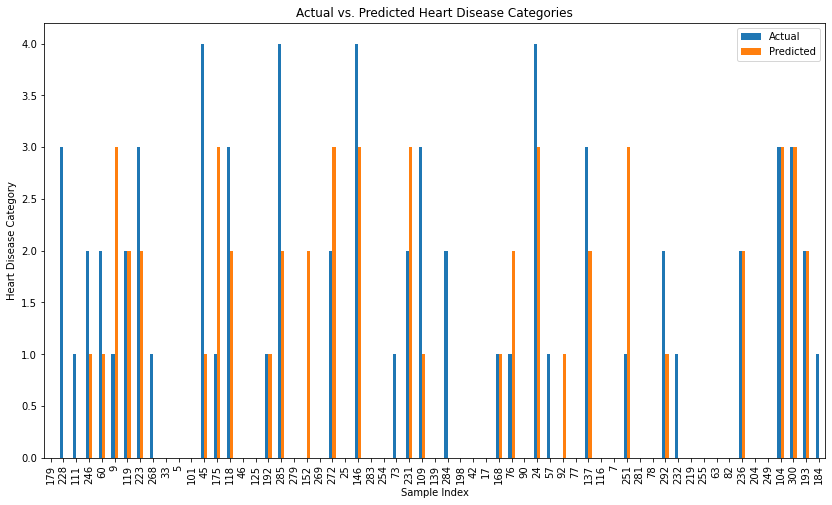

In [45]:
# Make predictions on the test data
y_pred = log_reg_model.predict(X_test)

# Create a DataFrame to store the actual and predicted values
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Plot the actual and predicted values

results_df.plot(kind='bar', figsize=(14, 8))
plt.xlabel('Sample Index')
plt.ylabel('Heart Disease Category')
plt.title('Actual vs. Predicted Heart Disease Categories')
plt.legend(loc='upper right')
plt.show()






In this plot, each bar represents a sample (test data point) with its index on the x-axis, and the y-axis represents the heart disease category. The "Actual" bars will show the true values (ground truth) from the test set, and the "Predicted" bars will show the values predicted by the logistic regression model.
You may need to adjust the plot size (figsize) based on the number of samples you want to display on the x-axis. This example assumes you have 61 samples in the test set, as mentioned in the classification report.

This bar plot will give you a visual comparison of the model's predictions against the actual values, allowing you to assess how well the model is performing.


In [46]:
# Get the coefficients and corresponding feature names
feature_importance = pd.Series(log_reg_model.coef_[0], index=X.columns)

# Sort the feature importance in descending order
sorted_feature_importance = feature_importance.abs().sort_values(ascending=False)

# Print the feature importance
print("Feature Importance:")
print(sorted_feature_importance)

Feature Importance:
thal        0.491895
ca          0.261822
oldpeak     0.249507
cp          0.195351
gender      0.107325
exang       0.101607
slope       0.076783
restecg     0.070493
thalach     0.035280
age         0.013351
fbs         0.003684
chol        0.003239
trestbps    0.000515
dtype: float64


The feature importance helps us understand which features have the most significant impact on predicting the presence or absence of heart disease.

In logistic regression, the model learns coefficients for each feature, indicating how much the log-odds of the target variable (heart disease in this case) change with respect to the change in the corresponding feature.

thal (thalassemia):

Feature Importance: 0.491895
Explanation: Thalassemia is a blood disorder, and a higher value in this feature indicates a higher severity of thalassemia. The high positive coefficient means that an increase in thalassemia severity is associated with a higher likelihood of having heart disease.

ca (number of major vessels):
Feature Importance: 0.261822
Explanation: The number of major vessels colored by fluoroscopy is an essential indicator of blood flow and circulation. A higher value in this feature implies a greater number of major vessels blocked. The positive coefficient suggests that more blocked vessels are associated with a higher likelihood of heart disease.

oldpeak (ST depression induced by exercise relative to rest):
Feature Importance: 0.249507
Explanation: The oldpeak feature represents the amount of ST segment depression induced by exercise. A higher value indicates more significant depression, which can be a sign of impaired cardiac function. The positive coefficient implies that more significant ST depression is associated with a higher likelihood of heart disease.

cp (chest pain type):
Feature Importance: 0.195351
Explanation: Chest pain type is a crucial symptom related to heart conditions. Different types of chest pain might indicate varying levels of risk. The positive coefficient suggests that certain chest pain types are associated with a higher likelihood of heart disease.

gender (gender of the patient):
Feature Importance: 0.107325
Explanation: Gender can play a role in heart disease risk, with differences in prevalence between males and females. The positive coefficient indicates that gender might contribute to the prediction of heart disease, with a higher likelihood for a particular gender.

The remaining features (thalach, age, fbs, chol, and trestbps) have smaller feature importance values, implying they have relatively lower impact on predicting heart disease in this model.